In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [17]:
df = pd.read_csv('glass.csv')
print(df.shape)

df.head()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
X = df.drop('Type', axis=1)
y = df['Type']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scaling Data for Homogeneous scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(X_test)
y_pred

array([2, 7, 1, 7, 1, 2, 1, 1, 2, 2, 2, 7, 1, 2, 6, 5, 7, 1, 2, 2, 1, 7,
       7, 7, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 7, 7, 1, 2, 2, 2, 2, 1],
      dtype=int64)

In [24]:
score = accuracy_score(y_test, y_pred)
score

0.6511627906976745

## Method 1: Select best k (Not Recommended)

In [25]:
# For best n_neighbours
import math
observations = df.shape[0]
k_max = math.sqrt(observations)
k_max

14.594519519326424

In [26]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy score when no. neighbours is 14:", accuracy_score(y_test, y_pred))

Accuracy score when no. neighbours is 14: 0.5581395348837209


## Method 2: By Experiment

Optimal k based on accuracy: 1


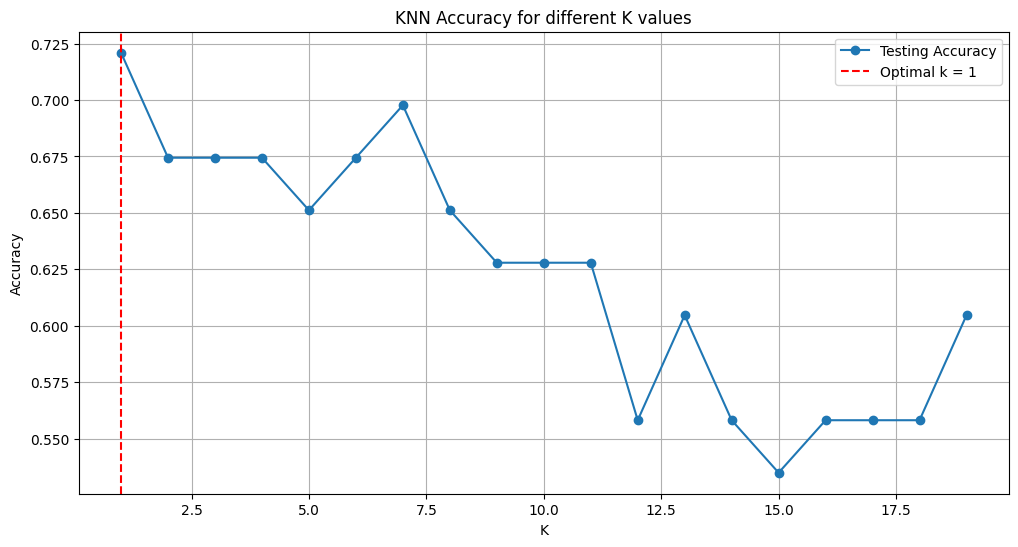

In [27]:
accuracy_scores = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)            
    y_pred = knn.predict(X_test)         
    accur = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accur)

# Optimal k = where test accuracy is max
optimal_k = np.argmax(accuracy_scores) + 1
print(f"Optimal k based on accuracy: {optimal_k}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), accuracy_scores, marker="o",label='Testing Accuracy')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different K values")
plt.grid(True)
plt.legend()
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy score when no. neighbours is 1:", accuracy_score(y_test, y_pred))

Accuracy score when no. neighbours is 1: 0.7209302325581395
